In [ ]:
# !pip install camelot-py[cv]
# !pip install PyPDF2==2.12.1

In [107]:
import os
import time
import pickle

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import camelot

import warnings
warnings.filterwarnings("ignore")

## Camelot

### Demo Run

In [2]:
pdf_folder_path = 'data/PPPP'
filename = '2022_Q1.pdf'

In [3]:
tables = camelot.read_pdf(
    os.path.join(pdf_folder_path,filename),
    pages='38-end',
    # process_background=True,
    flavor='stream',
    )

# Check how many tables were extracted
print(f"Total tables extracted: {len(tables)}")

# # Optionally, you can view the first table as a DataFrame
# df = tables[0].df
# display(df)

Total tables extracted: 60


In [4]:
all_dfs = [table.df for table in tables]

# Remove headers
all_dfs = [df.loc[4:,:].reset_index(drop=True) for df in all_dfs]

# Clear offset columns
for i,df in enumerate(all_dfs):
    df_temp = df.replace('', np.nan)
    df_temp = pd.concat([df_temp.loc[:,:9],
                         df_temp.loc[:,10:].dropna(axis=1,how='all')],axis=1)
    df_temp.columns = np.arange(len(df_temp.columns))
    all_dfs[i] = df_temp

# Make sure all tables have the same number of columns. Table 55 problematic
for i, df in enumerate(all_dfs):
    print(f'Table {i} has {len(df.columns)} columns')

Table 0 has 20 columns
Table 1 has 20 columns
Table 2 has 20 columns
Table 3 has 20 columns
Table 4 has 20 columns
Table 5 has 20 columns
Table 6 has 20 columns
Table 7 has 20 columns
Table 8 has 20 columns
Table 9 has 20 columns
Table 10 has 20 columns
Table 11 has 20 columns
Table 12 has 20 columns
Table 13 has 20 columns
Table 14 has 20 columns
Table 15 has 20 columns
Table 16 has 20 columns
Table 17 has 20 columns
Table 18 has 20 columns
Table 19 has 20 columns
Table 20 has 20 columns
Table 21 has 20 columns
Table 22 has 20 columns
Table 23 has 20 columns
Table 24 has 20 columns
Table 25 has 20 columns
Table 26 has 20 columns
Table 27 has 20 columns
Table 28 has 20 columns
Table 29 has 20 columns
Table 30 has 20 columns
Table 31 has 20 columns
Table 32 has 20 columns
Table 33 has 20 columns
Table 34 has 20 columns
Table 35 has 20 columns
Table 36 has 20 columns
Table 37 has 20 columns
Table 38 has 20 columns
Table 39 has 20 columns
Table 40 has 20 columns
Table 41 has 20 columns
Ta

In [5]:
# column 18 of table 55 looks like it ought to be for column 17
temp_all_dfs = [table.df for table in tables]
temp_all_dfs[55]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,MONTHLY REPORT ON PANTAWID PAMILYA COVERAGE ...,,,,,,,,,,...,,,,,,,,,,
1,,,,,,,,,,,...,,,SET,,,IPs in,,Itinerant,,Grand
2,REGION,PROVINCE,MUNICIPALITY,SET 1,SET 2,SET 3,SET 4,SET 5,SET 6,SET 7,...,SET 10,SET 11,,FNSP,HSF,,,,,
3,,,,,,,,,,,...,,,7M,,,GIDA,,IPs,,Total
4,,,,3,18,875,"16,379","3,799",775,"1,007",...,1,"2,437",-,2,-,"3,732",,,-,"29,091"
5,,BASILAN Total,,,,,,,,,...,,,,,,,,,,
6,,COTABATO,,,,,,,,,...,,,,,,,,,,
7,,(NORTH,ALEOSAN,-,-,-,237,7,11,14,...,2,-,-,-,-,,-,,-,300
8,,COTABATO),,,,,,,,,...,,,,,,,,,,
9,,,CARMEN,-,-,5,"1,245",4,59,112,...,-,-,-,-,-,,-,,-,"1,594"


In [6]:
# Dropping column 18 for table 55
all_dfs[55].drop(columns=[18],inplace=True)

# Gather all tables
for i in range(len(all_dfs)):
    all_dfs[i].columns = np.arange(len(all_dfs[i].columns))
df_all = pd.concat(all_dfs)
df_all.reset_index(inplace=True,drop=True)

In [7]:
# Check all total rows. Looks here like safe to split tables at this point
for i in range(len(df_all)):
    try:
        if 'total' in df_all.iloc[i,0].lower():
            print(f'~~~~~{i}~~~~~')
            display(df_all.iloc[i-5:i+3,:])
    except:
        pass

~~~~~52~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
47,NaN,NaN,PATEROS,5,3,187,11,13,933,97,2,73,24,-,-,-,-,-,-,"1,348"
48,NaN,NaN,TAGUIG CITY,992,43,58,"1,626","3,727",534,529,15,185,229,737,-,-,42,1,-,"8,718"
49,NaN,NCR FOURTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,"1,973",112,"3,109","3,886","4,199","20,971","3,269",128,"1,628","1,621","1,054",-,1,474,2,2,"42,429"
51,NaN,DISTRICT Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NCR Total,NaN,NaN,"8,671",448,"6,559","30,368","31,750","85,125","25,506",799,"7,523","8,727","4,047",1,8,"2,553",5,3,"212,093"
53,CAR,NaN,BANGUED (Capital),11,-,2,10,"1,199",52,87,1,20,-,-,-,1,-,1,-,"1,384"
54,NaN,ABRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


~~~~~151~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
146,NaN,NaN,SAGADA,1,-,1,2,198,17,2,1,2,-,5,-,-,-,-,-,229
147,NaN,NaN,TADIAN,-,2,1,2,575,32,44,6,3,-,-,-,-,-,-,-,665
148,NaN,MOUNTAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,NaN,NaN,NaN,"1,464",4,117,141,"2,552",149,264,26,123,4,86,2,2,-,681,-,"5,615"
150,NaN,PROVINCE Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,CAR Total,NaN,NaN,"9,679",27,"1,772","10,990","21,091","3,884","4,008",511,952,118,"1,119",10,16,-,"2,161",-,"56,338"
152,I,NaN,ADAMS,-,-,1,71,4,5,9,1,6,2,-,1,-,-,65,-,165
153,NaN,ILOCOS NORTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


~~~~~297~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
292,NaN,NaN,URBIZTONDO,"1,741",1,4,10,30,285,378,26,428,16,352,-,-,-,-,-,"3,271"
293,NaN,NaN,VILLASIS,4,-,2,6,24,"1,616",49,8,255,10,214,-,-,-,1,-,"2,189"
294,NaN,PANGASINAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,NaN,NaN,NaN,"7,636",36,"3,219","7,299","43,192","36,938","12,201",649,"10,678","2,004","9,529",5,1,1,205,-,"133,593"
296,NaN,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,I Total,NaN,NaN,"7,705","1,554","7,763","12,513","71,779","56,421","16,448",970,"16,073","3,627","11,668",32,1,2,"2,209",-,"208,765"
298,II,NaN,ABULUG,-,-,3,4,771,32,41,5,66,58,66,-,-,-,-,-,"1,046"
299,NaN,CAGAYAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


~~~~~404~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
399,NaN,NaN,DIFFUN,-,3,9,12,"1,616",77,54,3,125,105,59,-,-,-,239,-,"2,302"
400,NaN,NaN,MADDELA,2,1,2,9,752,26,39,7,59,70,15,-,-,-,1,-,983
401,NaN,NaN,NAGTIPUNAN,3,-,353,6,554,29,18,3,51,55,9,3,-,-,669,-,"1,753"
402,NaN,NaN,SAGUDAY,3,-,3,3,471,25,16,4,37,40,9,-,-,-,-,-,611
403,NaN,QUIRINO Total,NaN,12,4,373,46,"4,990",225,173,21,391,444,137,7,-,-,"1,528",-,"8,351"
404,II Total,NaN,NaN,"4,411",34,"8,580","7,312","49,925","13,083","4,014","1,325","5,362","3,892","4,244",51,1,1,"5,372",-,"107,607"
405,III,NaN,BALER (Capital),4,-,8,6,842,61,31,10,40,19,50,-,-,-,-,-,"1,071"
406,NaN,AURORA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


~~~~~577~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
572,NaN,NaN,SAN MARCELINO,3,-,392,16,17,519,43,13,52,42,-,-,-,-,190,-,"1,287"
573,NaN,NaN,SAN NARCISO,-,-,-,1,6,609,52,-,41,15,36,-,-,-,18,-,778
574,NaN,NaN,SANTA CRUZ,3,-,2,5,20,"1,852",173,1,149,65,1,-,-,-,46,-,"2,317"
575,NaN,NaN,SUBIC,15,7,19,29,"1,769",114,139,6,167,85,10,-,-,-,147,-,"2,507"
576,NaN,ZAMBALES Total,NaN,50,19,"1,631",205,"4,787","9,088","1,094",92,"1,102",619,268,2,-,9,"1,003",-,"19,969"
577,III Total,NaN,NaN,"6,195",295,"16,749","11,317","50,984","149,029","27,289","1,183","14,657","10,786","9,791",8,12,48,"4,116",-,"302,459"
578,NaN,NaN,AGONCILLO,5,-,-,11,7,"1,130",60,4,60,30,4,-,-,-,-,-,"1,311"
579,IV-A,BATANGAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


~~~~~751~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
746,NaN,NaN,TAYTAY,45,14,53,111,"3,784",361,646,4,215,154,3,-,-,-,-,-,"5,390"
747,NaN,NaN,TERESA,10,7,5,31,25,"1,253",135,1,52,80,54,-,2,-,2,-,"1,657"
748,NaN,NaN,NaN,466,140,"1,987","1,400","8,484","20,007","6,255",97,"1,195","1,788","1,358",2,10,5,310,-,"43,504"
749,NaN,RIZAL Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
750,NaN,NaN,NaN,"11,926",489,"19,639","53,348","58,626","108,555","28,155",783,"14,642","13,680","10,480",7,24,45,770,184,"321,353"
751,IV-A Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
752,NaN,NaN,BOAC (Capital),3,-,2,15,16,"1,792",102,5,130,64,260,-,-,-,-,-,"2,389"
753,MIMAROPA,MARINDUQUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


~~~~~854~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
849,NaN,NaN,(IMELDA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
850,NaN,NaN,NaN,48,622,"1,848","8,259","1,609",863,"1,362",85,"1,141",634,"1,300",13,-,-,895,-,"18,679"
851,NaN,ROMBLON Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852,MIMAROPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,NaN,"24,339","16,605","17,581","46,368","24,262","15,469","11,442","1,634","9,008","6,780","14,987",99,7,1,"14,534",5,"203,121"
854,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,V,NaN,BACACAY,3,-,371,31,14,"3,138",127,28,257,151,201,-,-,-,-,-,"4,321"
856,NaN,ALBAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


~~~~~1004~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
999,NaN,NaN,PRIETO DIAZ,2,-,3,"1,189",36,65,77,8,111,68,14,11,-,-,493,-,"2,077"
1000,NaN,NaN,SANTA MAGDALENA,2,-,6,"1,030",10,23,119,8,94,34,19,-,-,-,-,-,"1,345"
1001,NaN,SORSOGON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,58,"3,103","10,926","26,360","3,790","2,190","3,107",290,"4,240","2,475","1,100",15,13,-,"1,443",-,"59,110"
1003,NaN,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,V Total,NaN,NaN,"25,089","14,526","41,115","122,461","44,839","48,057","21,127","2,928","21,508","15,857","17,429",62,34,-,"4,864",-,"379,896"
1005,VI,NaN,ALTAVAS,1,-,5,"1,017",5,73,95,10,16,46,35,-,-,-,4,-,"1,307"
1006,NaN,AKLAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


~~~~~1165~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1160,NaN,NaN,TOBOSO,1,-,398,"1,386",52,399,145,2,118,74,165,-,2,-,-,-,"2,742"
1161,NaN,NaN,VALLADOLID,1,2,4,16,14,837,51,4,25,59,129,-,-,-,-,-,"1,142"
1162,NaN,NEGROS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1163,NaN,OCCIDENTAL,NaN,124,55,"14,039","26,612","34,670","25,566","11,009",417,"5,546","6,647","7,211",7,14,1,"1,272",-,"133,190"
1164,NaN,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1165,VI Total,NaN,NaN,"8,584","3,050","29,013","111,453","60,816","46,362","25,459","1,343","16,879","13,209","13,280",21,23,1,"3,033",-,"332,526"
1166,VII,NaN,ALBURQUERQUE,-,-,1,3,3,149,1,2,8,8,-,-,-,-,1,-,176
1167,NaN,BOHOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


~~~~~1324~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1319,NaN,NaN,LAZI,4,6,372,473,16,160,93,7,85,2,-,-,-,-,-,-,"1,218"
1320,NaN,NaN,MARIA,4,2,2,469,4,6,144,3,36,-,-,-,1,-,-,-,671
1321,NaN,NaN,SAN JUAN,3,3,3,8,506,32,63,2,58,-,-,-,-,-,-,-,678
1322,NaN,NaN,SIQUIJOR (Capital),1,2,3,10,541,24,96,6,34,1,-,-,1,-,-,-,719
1323,NaN,SIQUIJOR Total,NaN,16,17,382,"1,137","1,071",372,476,19,234,5,-,-,2,-,1,-,"3,732"
1324,VII Total,NaN,NaN,"16,401",342,"29,483","64,073","61,170","34,693","13,152","18,747","14,393","6,010","3,453",51,"10,595",430,"2,388",-,"275,381"
1325,VIII,NaN,ALMERIA,4,2,2,9,386,25,10,-,29,19,118,-,-,-,6,-,610
1326,NaN,BILIRAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


~~~~~1504~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1499,NaN,NaN,SOGOD,2,4,9,34,"1,643",105,77,2,115,35,296,-,-,-,-,-,"2,322"
1500,NaN,NaN,TOMAS OPPUS,-,1,362,9,305,33,70,-,77,27,71,-,-,-,-,-,955
1501,NaN,SOUTHERN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1502,NaN,NaN,NaN,29,30,"1,637","1,959","10,021","1,337",937,177,"1,334",606,"1,635",-,3,1,16,-,"19,722"
1503,NaN,LEYTE Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1504,VIII Total,NaN,NaN,"12,158","30,564","16,699","67,336","47,047","32,872","16,953","6,037","14,948","8,740","13,872",31,"13,022",5,108,-,"280,392"
1505,NaN,NaN,CITY OF ISABELA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1506,IX,NaN,NaN,11,15,833,"2,844",116,"2,101",625,524,105,4,4,8,1,-,811,-,"8,002"


~~~~~1609~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1604,NaN,NaN,TITAY,15,59,9,"2,837",86,438,254,119,69,4,-,4,-,-,509,-,"4,403"
1605,NaN,NaN,TUNGAWAN,10,"2,355",16,105,21,774,245,108,56,7,-,3,-,-,269,-,"3,969"
1606,NaN,ZAMBOANGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1607,NaN,NaN,NaN,121,"7,129","4,731","14,428","9,680","4,250","4,240","1,676",627,98,26,36,9,-,"4,579",-,"51,630"
1608,NaN,SIBUGAY Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1609,IX Total,NaN,NaN,"23,235","51,283","12,473","70,074","20,877","40,755","18,745","11,499","3,359",539,"4,024",183,"1,788",10,"21,878",123,"280,845"
1610,X,NaN,BAUNGON,5,14,6,"1,579",52,137,69,2,197,143,2,2,-,-,134,-,"2,342"
1611,NaN,BUKIDNON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


~~~~~1736~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1731,NaN,NaN,TALISAYAN,3,2,5,"1,246",32,129,77,3,96,142,26,-,-,-,-,-,"1,761"
1732,NaN,NaN,VILLANUEVA,1,6,9,46,"1,694",41,74,5,58,110,-,-,-,-,1,-,"2,045"
1733,NaN,MISAMIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1734,NaN,NaN,NaN,"1,633","1,932","1,502","33,837","11,354","2,987","6,956",378,"3,497","4,535",557,14,29,73,"1,521",-,"70,805"
1735,NaN,ORIENTAL Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736,X Total,NaN,NaN,"25,926","16,646","18,015","92,316","28,558","12,014","16,009","1,171","17,461","15,799","6,653",173,88,168,"16,538",-,"267,535"
1737,XI,NaN,COMPOSTELA,16,18,693,"2,953",57,353,"2,520",11,255,237,77,2,-,-,213,-,"7,405"
1738,NaN,DAVAO DE ORO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


~~~~~1827~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1822,NaN,NaN,SAN ISIDRO,6,11,328,"1,148",41,177,113,15,155,138,121,-,-,-,1,-,"2,254"
1823,NaN,NaN,TARRAGONA,9,"1,952",-,19,17,303,335,4,131,233,55,-,-,-,-,-,"3,058"
1824,NaN,DAVAO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1825,NaN,NaN,NaN,"3,576","2,071",733,"12,073","7,169","1,271","8,077",151,"2,111","2,092","1,463",-,-,-,214,-,"41,001"
1826,NaN,ORIENTAL Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1827,XI Total,NaN,NaN,"6,443","26,971","7,657","56,179","44,380","20,378","38,402","2,598","9,201","10,990","7,126",147,12,2,"27,208",1,"257,695"
1828,XII,(NORTH,ALAMADA,4,10,273,"2,575",37,240,284,9,176,147,-,-,3,-,1,-,"3,759"
1829,NaN,COTABATO),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


~~~~~1905~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1900,NaN,NaN,PRESIDENT QUIRINO,1,-,-,"1,320",14,113,81,56,138,32,144,-,1,-,-,-,"1,900"
1901,NaN,NaN,SEN. NINOY AQUINO,-,"1,972",6,15,6,544,153,100,78,2,19,3,-,-,842,-,"3,740"
1902,NaN,SULTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,NaN,NaN,NaN,28,"2,043","4,797","19,844","4,758","2,602","2,281","1,824","1,677",792,"2,339",9,7,-,"3,932",-,"46,933"
1904,NaN,KUDARAT Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,XII Total,NaN,NaN,"4,756","9,774","11,059","67,142","37,332","17,826","10,208","7,936","8,135","4,262","4,214",66,25,-,"19,763",-,"202,498"
1906,NaN,AGUSAN DEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1907,CARAGA,NaN,BUENAVISTA,19,29,7,"2,757",52,537,243,10,245,159,38,2,-,-,275,-,"4,373"


~~~~~2022~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2017,NaN,SURIGAO DEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,"7,035","3,256","6,710","6,684","5,905","3,175","4,389",776,"2,679","1,919",331,11,4,-,"2,322",-,"45,196"
2019,NaN,SUR Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,CARAGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,NaN,NaN,NaN,"30,287","19,576","12,790","40,614","9,803","17,716","17,203","4,350","9,376","6,491","1,726",73,9,244,"15,655",-,"185,913"
2022,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023,NaN,NaN,AKBAR,-,-,-,"1,034",41,2,18,1,-,1,117,-,-,-,-,-,"1,214"
2024,BARMM,BASILAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


~~~~~2229~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2224,NaN,TAWI-TAWI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2225,NaN,NaN,NaN,"1,991",17,"6,034","3,199","2,947","1,765","2,912",47,1,-,32,-,-,-,"15,096",-,"34,041"
2226,NaN,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2227,BARMM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2228,NaN,NaN,NaN,"8,012","9,628","54,560","119,506","40,871","45,231","40,025","4,737","1,053","1,459","5,243",15,14,1,"30,928",-,"361,283"
2229,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2230,Grand Total,NaN,NaN,"233,817","201,812","311,507","983,370","704,110","747,470","334,145","68,551","184,530","130,966","133,356","1,030","25,679","3,511","171,530",316,"4,235,700"


~~~~~2230~~~~~


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2225,NaN,NaN,NaN,"1,991",17,"6,034","3,199","2,947","1,765","2,912",47,1,-,32,-,-,-,"15,096",-,"34,041"
2226,NaN,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2227,BARMM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2228,NaN,NaN,NaN,"8,012","9,628","54,560","119,506","40,871","45,231","40,025","4,737","1,053","1,459","5,243",15,14,1,"30,928",-,"361,283"
2229,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2230,Grand Total,NaN,NaN,"233,817","201,812","311,507","983,370","704,110","747,470","334,145","68,551","184,530","130,966","133,356","1,030","25,679","3,511","171,530",316,"4,235,700"


In [94]:
def get_total_locs(df,col=0):
    total_rows = []
    for i in range(len(df)):
        if (not pd.isna(df.iloc[i,col])) and ('total' in df.iloc[i,col].lower()):
            total_rows.append(i)
    return total_rows

def split_tables(df,total_rows):
    previous_ind = -1
    all_dfs = []
    for i,ind in enumerate(total_rows):
        all_dfs.append(df.iloc[previous_ind+1:ind+1,:].reset_index(drop=True))
        previous_ind = ind
    return all_dfs

def get_totals(df,col=0):
    starter = -1
    total_row = df.iloc[starter,:]
    offset = 0
    while df.iloc[starter-offset,3:19].isnull().all(): # Find number of row offsets before hitting required values
        offset += 1
    total_row.iloc[3:] = df.iloc[starter-offset,3:]    # Fill in values

    name_list = list(df.iloc[starter-2*offset:,col].values)
    name_list = ['' if isinstance(name, float) and math.isnan(name) else name for name in name_list]
    
    total_row.iloc[col] = ' '.join(list(name_list))    
    total_row.iloc[min(col+1,2)] = 'Total'
    total_row.iloc[min(col+2,2)] = 'Total'  
    total_row.iloc[col] = total_row.iloc[col].rstrip('Total').strip()
    name = total_row.iloc[col]
    return total_row, name

def clean_province_df(df_or):
    df = df_or.copy()
    municipality_vals = []
    row_counter = -1
    while row_counter < len(df)-1:
        row_counter += 1
        if pd.isna(df.iloc[row_counter,2]): # Skip if no name on municipality column. Would normally have values
            continue
            
        offset = 0
        row_val = df.iloc[row_counter,:]
        while df.iloc[row_counter+offset,3:19].isnull().all(): # Find number of row offsets before hitting required values
            offset += 1
        row_val.iloc[3:] = df.iloc[row_counter+offset,3:]    # Fill in values

        name_list = list(df.iloc[row_counter:row_counter+2*offset+1:,2].values)
        name_list = ['' if isinstance(name, float) and math.isnan(name) else name for name in name_list]
        row_counter += 2*offset
        
        row_val.iloc[2] = ' '.join(list(name_list)).strip()
        if row_val.iloc[2] != 'Total':
            municipality_vals.append(row_val)
        
    return pd.DataFrame(municipality_vals)

In [96]:
# Split table by region
total_rows_region = get_total_locs(df_all,col=0)         # Get row numbers corresponding to 'total' rows for REGION
region_dfs = split_tables(df_all,total_rows_region)      # Split into one table per REGION

# Collect
region_totals = []
province_totals = []
municipals = []
for region_df_or in region_dfs:
    # Get region totals
    region_df = region_df_or.copy()
    total_row, region_name = get_totals(region_df,col=0)
    region_totals.append(total_row)    
    
    # Split table by province
    region_df = region_df_or.copy()
    total_rows_province = get_total_locs(region_df,col=1)     # Get row numbers corresponding to 'total' rows for PROVINCE
    province_dfs = split_tables(region_df,total_rows_province)      # Split into one table per REGION

    for province_df_or in province_dfs:
        province_df = province_df_or.copy()
        total_row, province_name = get_totals(province_df,col=1)
        total_row.iloc[0] = region_name
        province_totals.append(total_row)
        municipal_df = clean_province_df(province_df)
        municipal_df.loc[:,0] = region_name
        municipal_df.loc[:,1] = province_name
        municipals.append(municipal_df)

In [97]:
df_region_totals = pd.DataFrame(region_totals)
df_province_totals = pd.DataFrame(province_totals)
df_municipals = pd.concat(municipals,axis=0)

In [98]:
# Convert to numbers
df_region_totals = pd.DataFrame(region_totals)
for i in range(3,20):
    df_region_totals.loc[:,i] = df_region_totals.loc[:,i].str.replace(',','')
    df_region_totals.loc[:,i] = df_region_totals.loc[:,i].str.replace('-','0')
df_region_totals.fillna(0,inplace=True)
df_region_totals = df_region_totals.astype({i:'int' for i in range(3,20)})

df_province_totals = pd.DataFrame(province_totals)
for i in range(3,20):
    df_province_totals.loc[:,i] = df_province_totals.loc[:,i].str.replace(',','')
    df_province_totals.loc[:,i] = df_province_totals.loc[:,i].str.replace('-','0')

df_province_totals.fillna(0,inplace=True)
df_province_totals = df_province_totals.astype({i:'int' for i in range(3,20)})

In [99]:
# Check if province sums up to region values. It does!
df_province_totals.groupby(0).sum().drop(columns=[1,2]).sort_index().equals(df_region_totals.drop(columns=[1,2]).set_index(0).drop('Grand').sort_index())

True

In [100]:
df_municipals = pd.concat(municipals,axis=0)
for i in range(3,20):
    df_municipals.loc[:,i] = df_municipals.loc[:,i].str.replace(',','')
    df_municipals.loc[:,i] = df_municipals.loc[:,i].str.replace('-','0')

df_municipals.fillna(0,inplace=True)
df_municipals = df_municipals.astype({i:'int' for i in range(3,20)})

In [106]:
# check if municipal sums up to province values. It does!
df_municipals.groupby([0,1]).sum().drop(columns=[2]).reset_index().sort_values([0,1]).equals(df_province_totals.drop(columns=[2]).sort_values([0,1]).reset_index(drop=True))

True

### Others

In [12]:
tables[0].parsing_report

{'accuracy': 100.0, 'whitespace': 42.86, 'order': 1, 'page': 38}

/tmp/ipykernel_127358/3259206825.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[0], kind='text').show()


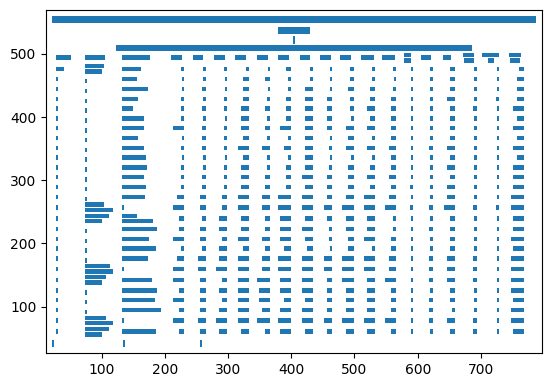

In [14]:
camelot.plot(tables[0], kind='text').show()

/tmp/ipykernel_127358/311955129.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[0], kind='grid').show()


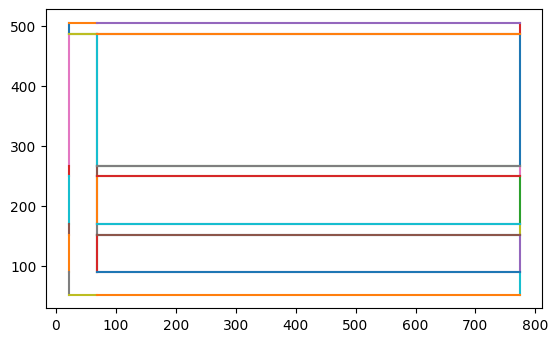

In [15]:
camelot.plot(tables[0], kind='grid').show()

/tmp/ipykernel_127358/505061648.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[0], kind='contour').show()


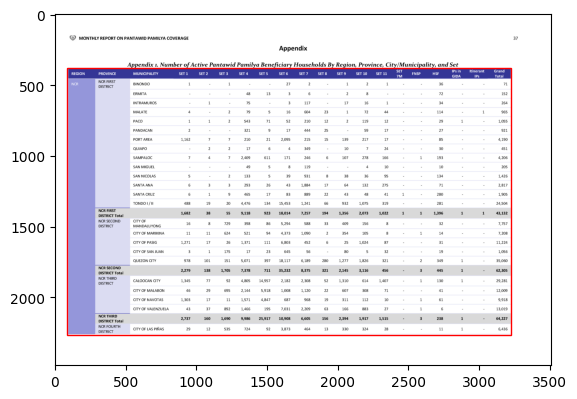

In [16]:
camelot.plot(tables[0], kind='contour').show()


/tmp/ipykernel_127358/2894074081.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[0], kind='line').show()


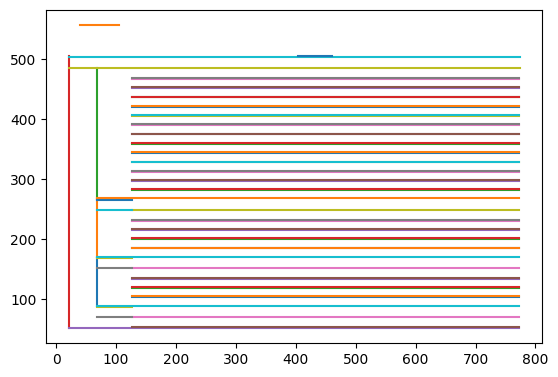

In [17]:
camelot.plot(tables[0], kind='line').show()


/tmp/ipykernel_127358/2994349711.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[0], kind='joint').show()


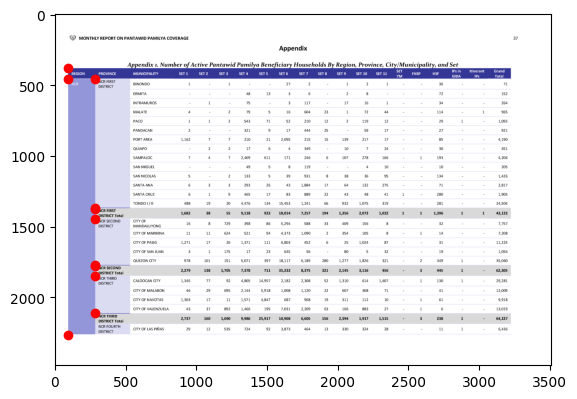

In [18]:
camelot.plot(tables[0], kind='joint').show()

In [19]:
camelot.plot(tables[0], kind='textedge').show()

NotImplementedError: Lattice flavor does not support kind='textedge'

In [13]:
tables_2022_q1_folder_path = os.path.join(pdf_folder_path,'q1_2022')

os.makedirs(tables_2022_q1_folder_path, exist_ok=True)

# Iterate over the extracted tables and save them as CSV files
for i, table in enumerate(tables):
    output_file = os.path.join(tables_2022_q1_folder_path,f"table_{i+1}.csv")
    table.to_csv(output_file)
    print(f"Saved: {output_file}")


Saved: data/PPPP/q1_2022/table_1.csv
Saved: data/PPPP/q1_2022/table_2.csv
Saved: data/PPPP/q1_2022/table_3.csv
Saved: data/PPPP/q1_2022/table_4.csv
Saved: data/PPPP/q1_2022/table_5.csv
Saved: data/PPPP/q1_2022/table_6.csv
Saved: data/PPPP/q1_2022/table_7.csv
Saved: data/PPPP/q1_2022/table_8.csv
Saved: data/PPPP/q1_2022/table_9.csv
Saved: data/PPPP/q1_2022/table_10.csv
Saved: data/PPPP/q1_2022/table_11.csv
Saved: data/PPPP/q1_2022/table_12.csv
Saved: data/PPPP/q1_2022/table_13.csv
Saved: data/PPPP/q1_2022/table_14.csv
Saved: data/PPPP/q1_2022/table_15.csv
Saved: data/PPPP/q1_2022/table_16.csv
Saved: data/PPPP/q1_2022/table_17.csv
Saved: data/PPPP/q1_2022/table_18.csv
Saved: data/PPPP/q1_2022/table_19.csv
Saved: data/PPPP/q1_2022/table_20.csv
Saved: data/PPPP/q1_2022/table_21.csv
Saved: data/PPPP/q1_2022/table_22.csv
Saved: data/PPPP/q1_2022/table_23.csv
Saved: data/PPPP/q1_2022/table_24.csv
Saved: data/PPPP/q1_2022/table_25.csv
Saved: data/PPPP/q1_2022/table_26.csv
Saved: data/PPPP/q1_2

## gmft

### Main

quick check - Doesn't seem to work. not gonna debug

In [5]:
import importlib
import gmft
import gmft.table_detection
import gmft.table_visualization
import gmft.table_function
import gmft.table_function_algorithm
import gmft.table_captioning
import gmft.pdf_bindings.bindings_pdfium
import gmft.pdf_bindings
import gmft.common

importlib.reload(gmft)
importlib.reload(gmft.common)
importlib.reload(gmft.table_captioning)
importlib.reload(gmft.table_detection)
importlib.reload(gmft.table_visualization)
importlib.reload(gmft.table_function)
importlib.reload(gmft.table_function_algorithm)
importlib.reload(gmft.pdf_bindings.bindings_pdfium)
importlib.reload(gmft.pdf_bindings)

<module 'gmft.pdf_bindings' from '/home/tfc/anaconda3/envs/sat_dl/lib/python3.11/site-packages/gmft/pdf_bindings/__init__.py'>

In [6]:
pdf_folder_path = 'data/PPPP'
filename = '2022_Q1.pdf'

In [7]:
from gmft.pdf_bindings import PyPDFium2Document
from gmft import CroppedTable, TableDetector

detector = TableDetector()

def ingest_pdf(pdf_path) -> list[CroppedTable]:
    doc = PyPDFium2Document(pdf_path)

    tables = []
    for page in doc:
        tables += detector.extract(page)
    return tables, doc

tables, doc = ingest_pdf(os.path.join(pdf_folder_path,filename))
doc.close() # once you're done with the document

In [10]:
for table in tables:
    try:
        table.visualize(figsize=None)
    except:
        pass

In [8]:
from gmft import AutoTableFormatter

formatter = AutoTableFormatter()

In [29]:
ft = formatter.extract(tables[0])
ft.visualize()

ArgumentError: argument 1: TypeError: expected LP_struct_fpdf_page_t__ instance instead of NoneType

In [31]:
ft = formatter.extract(tables[40])


ArgumentError: argument 1: TypeError: expected LP_struct_fpdf_page_t__ instance instead of NoneType